# Twitter Data EDA

## handle imports

In [1]:
%cd ../

/home/hat/dev-env/10Acadamy/week_0/Twitter-Data-Analysis


In [2]:
# extrenal modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
# custom modules
from clean_tweets_dataframe import Clean_Tweets
from extract_dataframe import read_json, TweetDfExtractor

%matplotlib inline

In [3]:
def get_extracted_data() -> pd.DataFrame:
    csv_path = 'processed_tweet_data.csv'
    if not os.path.exists(csv_path):
        data_path = "data/Economic_Twitter_Data.json"
        tweets_num, tweet_list = read_json(data_path)
        print(f"Oiginal tweets count is {tweets_num}")
        tweet = TweetDfExtractor(tweet_list)
        tweet_df = tweet.get_tweet_df(save=True)
        
    else:
        tweet_df = pd.read_csv(csv_path)
    print(f"shape: {tweet_df.shape}")
    print(tweet_df.info())
    return tweet_df


tweet_df = get_extracted_data()

Oiginal tweets count is 24625
File Successfully Saved.!!!
shape: (24625, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       24625 non-null  object 
 14  place               24625

As we can see, there are lots of missing values and columns with the wrong datatypes. 
We have the Clean_Tweets class to handle this for us. 

In [4]:
cleaner = Clean_Tweets(tweet_df)
# cleaner.run_pipeline()
print(cleaner.df.info())

Automation in Action...!!!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4307 entries, 0 to 4306
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          4307 non-null   datetime64[ns, UTC]
 1   source              4307 non-null   object             
 2   original_text       4307 non-null   object             
 3   polarity            4307 non-null   float64            
 4   subjectivity        4307 non-null   float64            
 5   lang                4307 non-null   object             
 6   favorite_count      4307 non-null   int64              
 7   retweet_count       4307 non-null   float64            
 8   original_author     4307 non-null   object             
 9   followers_count     4307 non-null   int64              
 10  friends_count       4307 non-null   int64              
 11  possibly_sensitive  4307 non-null   object             
 12  hashtag

In [5]:
cleaner.df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:32:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",MICKEY’S BAD MOVE: @GovRonDeSantis has now sig...,-0.037500,0.533333,en,1,0.0,MercuryReports,9254,9422,False,[],['GovRonDeSantis'],All Over America
1,2022-04-22 22:16:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",ELECTIONS HAVE CONSEQUENCES: Biden’s historic ...,-0.066667,0.033333,en,1,0.0,MercuryReports,9254,9422,False,[],[],All Over America
2,2022-04-22 07:15:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",COINCIDENCE? 18 U.S. food processing facilitie...,-0.077778,0.177778,en,4,1.0,MercuryReports,9254,9422,False,[],[],All Over America
3,2022-04-22 07:11:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",FOOD PROCESSING PLANTS BEING DESTROYED: “A Sma...,-0.100000,0.450000,en,3,2.0,MercuryReports,9254,9422,False,[],[],All Over America
4,2022-04-21 22:22:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",DISGUSTING HUMAN BEING: What one person calls ...,-0.500000,0.550000,en,1,0.0,MercuryReports,9254,9422,False,[],[],All Over America


In [7]:
cleaned_df = cleaner.df

In [16]:
cleaned_df.sort_values('created_at', ascending=True, inplace=True, ignore_index=True)
cleaned_df.loc[0, 'created_at'], cleaned_df.loc[len(cleaned_df)-1, 'created_at']

(Timestamp('2021-01-07 04:30:23+0000', tz='UTC'),
 Timestamp('2022-04-22 23:07:15+0000', tz='UTC'))

The timeline for the data we have is between 07-Jan-2021 upto 22-Apr-2022

### ratio of android vs iphone users

In [54]:
# tweet_df.plot(kind='bar', y='polarity')

<BarContainer object of 66 artists>

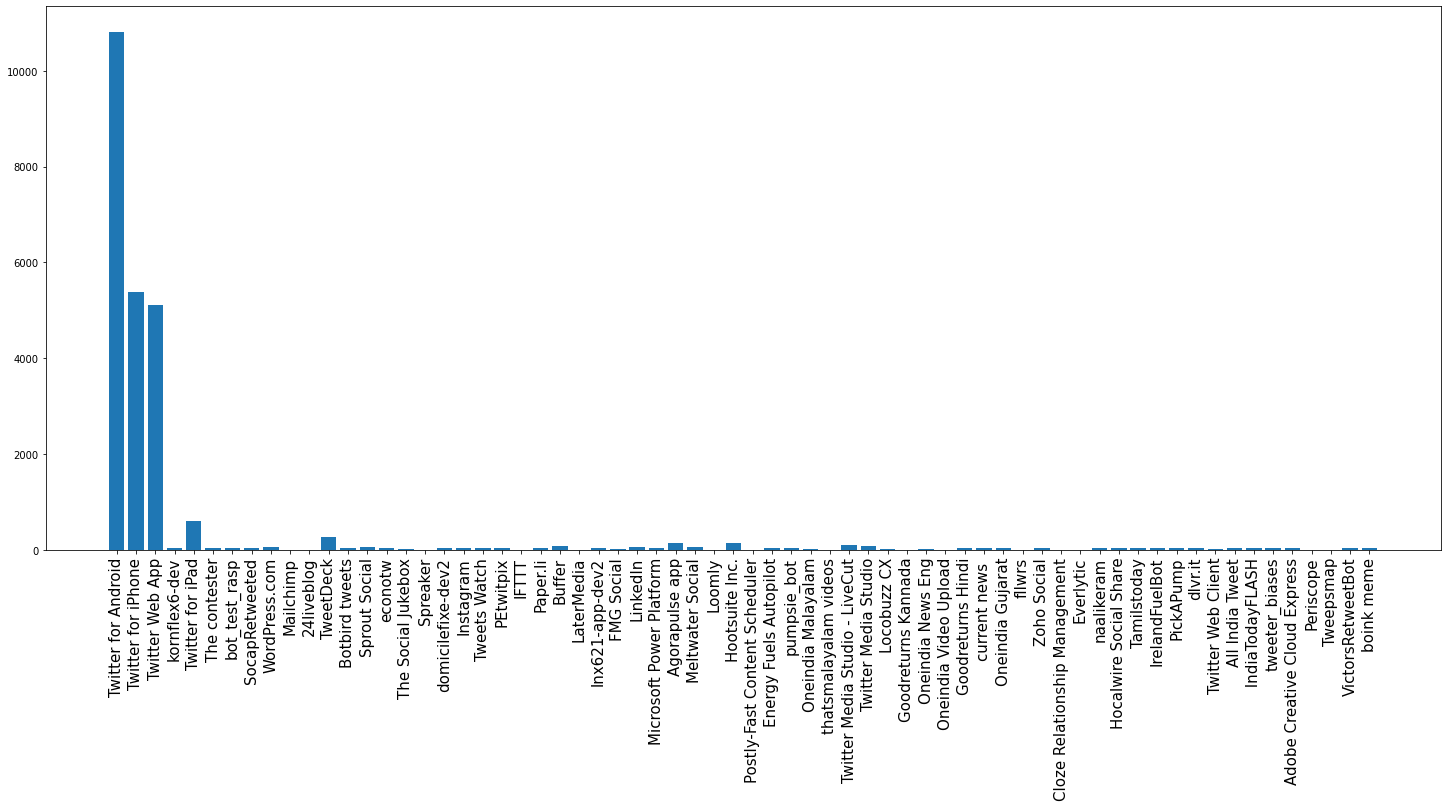

In [55]:
from collections import Counter
sources = {**Counter(tweet_df.source.values.tolist())}
fig = plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=15)
plt.bar(sources.keys(), sources.values())

In [53]:
# sources_df = pd.DataFrame({**sources}, index=range(len(sources)))
# sources_df.plot(kind="bar")